In [26]:
import pandas as pd

df = pd.read_csv("parsed_real_afl_attendance_2024.csv")
df.head()

df = df.dropna(subset=["Crowd", "Home v Away Teams"])
teams_split = df["Home v Away Teams"].str.split(" v ", expand=True)
df["home_team"] = teams_split[0]
df["away_team"] = teams_split[1]

df["Crowd"] = df["Crowd"].astype(int)
df

,Round,Date,Home v Away Teams,Venue,Crowd,Result,Disposals,Goals,home_team,away_team
0,0,Thu 7 Mar 7:30pm,Sydney v Melbourne,SCG,40012,86-64,J. Viney 30,C. Oliver 30; B. Fritsch 4,Sydney,Melbourne
1,0,Fri 8 Mar 6:40pm,Brisbane v Carlton,Gabba,33367,85-86,G. Hewett 27,C. Curnow 4,Brisbane,Carlton
2,0,Sat 9 Mar 3:20pm,Gold Coast v Richmond,People First Stadium,22086,99-60,M. Rowell 33,B. King 5,Gold Coast,Richmond
13,0,Sat 9 Mar 7:30pm,GWS v Collingwood,ENGIE Stadium,21235,114-82,N. Daicos 34,C. Brown 5; Date\tHome v Away Teams\tVenue\tCr...,GWS,Collingwood
14,1,Thu 14 Mar 7:30pm,Carlton v Richmond,MCG,83881,86-81,P. Cripps 31,H. McKay 3; N. Balta 3,Carlton,Richmond
...,...,...,...,...,...,...,...,...,...,...
247,24,Fri 13 Sep 7:10pm,Port Adelaide v Hawthorn,Adelaide Oval,51012,75-72,J. Newcombe 31,N. Watson 3; M. Georgiades 3,Port Adelaide,Hawthorn
248,24,Sat 14 Sep 7:30pm,GWS v Brisbane,ENGIE Stadium,18357,100-105,T. Green 33,J. Hogan 5; Preliminary Final; Date\tHome v Aw...,GWS,Brisbane
249,24,Fri 20 Sep 7:40pm,Sydney v Port Adelaide,SCG,44053,95-59,E. Gulden 27,T. Papley 3; J. Amartey 3,Sydney,Port Adelaide
250,24,Sat 21 Sep 5:15pm,Geelong v Brisbane,MCG,93066,85-95,D. Zorko 32,O. Henry 4; Grand Final; Date\tHome v Away Tea...,Geelong,Brisbane


In [27]:
df.groupby("home_team")["Crowd"].mean().sort_values(ascending=False).head(20)

home_team
Collingwood         64905.416667
Carlton             58310.636364
Essendon            50478.454545
Fremantle           46814.583333
Richmond            44402.500000
Sydney              43391.500000
Geelong             43378.416667
West Coast          43149.500000
Adelaide            41421.250000
Port Adelaide       39700.000000
Hawthorn            36036.545455
Western Bulldogs    35268.153846
Melbourne           34928.636364
Brisbane            29553.538462
St Kilda            29257.363636
North Melbourne     21954.000000
Gold Coast          15063.333333
GWS                 12781.500000
Name: Crowd, dtype: float64

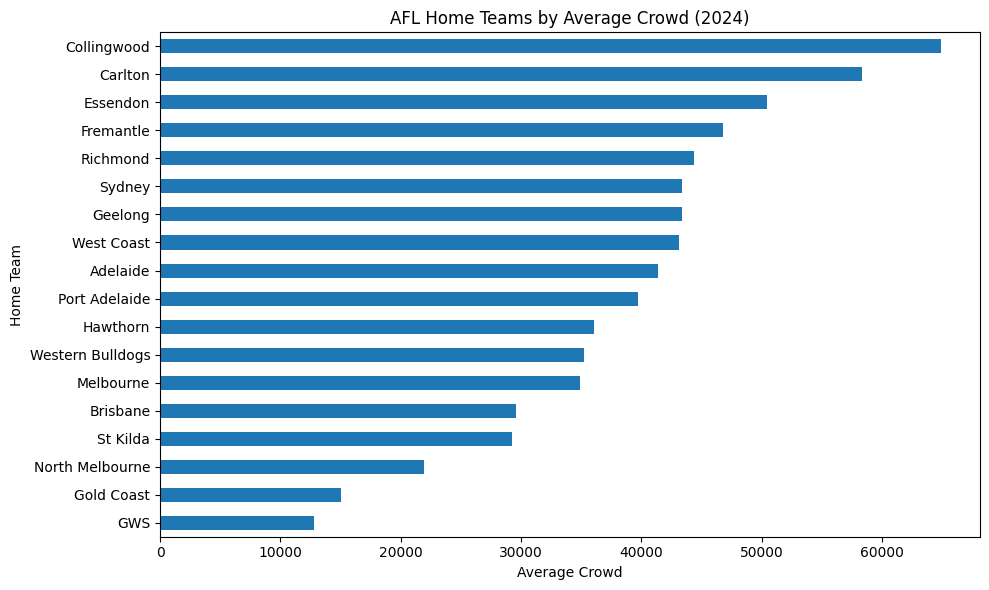

In [28]:
import matplotlib.pyplot as plt

top_home = df.groupby("home_team")["Crowd"].mean().sort_values(ascending=False).head(18)

top_home.plot(kind="barh", figsize=(10, 6), title="AFL Home Teams by Average Crowd (2024)")
plt.xlabel("Average Crowd")
plt.ylabel("Home Team")
plt.gca().invert_yaxis()  # So biggest is on top
plt.tight_layout()
plt.show()


In [71]:
venue_summary = df.groupby("Venue")["Crowd"].agg(["count", "mean", "sum"]).sort_values("mean", ascending=False)
venue_summary.rename(columns={"count": "Games", "mean": "Average Crowd", "sum": "Total Crowd"}, inplace=True)
venue_summary.head(100)


,Games,Average Crowd,Total Crowd
Venue,,,
MCG,50,60730.700000,3036535
Optus Stadium,22,46562.454545,1024374
Adelaide Oval,29,40965.275862,1187993
SCG,13,39036.000000,507468
Marvel Stadium,43,32771.860465,1409190
GMHBA Stadium,9,31666.888889,285002
Gabba,12,31263.250000,375159
People First Stadium,9,16919.444444,152275
Manuka Oval,3,12932.000000,38796


In [40]:
# Some entries are empty, so we'll use errors='coerce'
df["parsed_date"] = pd.to_datetime("2024 " + df["Date"], errors="coerce", format="%Y %a %d %b %I:%M%p")

# Drop games after September 1st (i.e., finals)
df_regular = df[df["parsed_date"] < "2024-09-01"]

In [41]:

# Filter only games at the MCG
mcg_df = df_regular[df_regular["Venue"] == "MCG"]

mcg_home_summary = mcg_df.groupby("home_team")["Crowd"].mean().sort_values(ascending=False)
mcg_home_summary

home_team
Carlton        78141.200000
Collingwood    72770.666667
Essendon       72585.000000
Geelong        71236.500000
St Kilda       69517.000000
Hawthorn       52920.000000
Richmond       50203.000000
Melbourne      37810.600000
Name: Crowd, dtype: float64

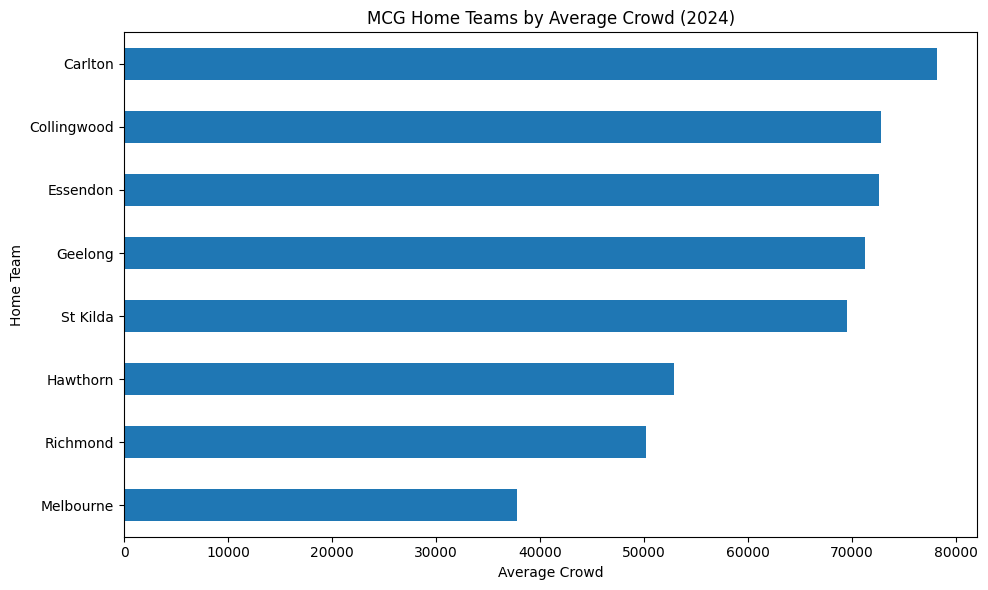

In [61]:
mcg_home_summary.plot(kind="barh", figsize=(10, 6), title="MCG Home Teams by Average Crowd (2024)")
plt.xlabel("Average Crowd")
plt.ylabel("Home Team")
plt.gca().invert_yaxis()  # So biggest is on top
plt.tight_layout()
plt.show()

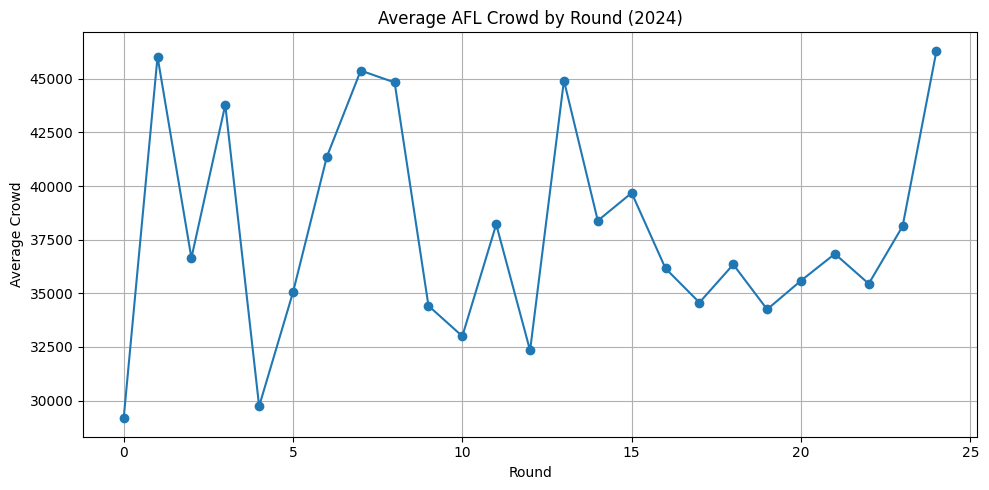

In [42]:
# Clean up 'Round' in case it's a float or string
df["Round"] = df["Round"].astype(int)

round_summary = df.groupby("Round")["Crowd"].mean()
round_summary.plot(marker='o', figsize=(10, 5), title="Average AFL Crowd by Round (2024)")
plt.ylabel("Average Crowd")
plt.xlabel("Round")
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
# Group by team and round
home_round_attendance = df_regular.groupby(["home_team", "Round"])["Crowd"].mean().reset_index()
attendance_matrix = home_round_attendance.pivot(index="Round", columns="home_team", values="Crowd")


In [68]:
# Similar matrix for away games
away_round_attendance = df_regular.groupby(["away_team", "Round"])["Crowd"].mean().reset_index()
away_matrix = away_round_attendance.pivot(index="Round", columns="away_team", values="Crowd")


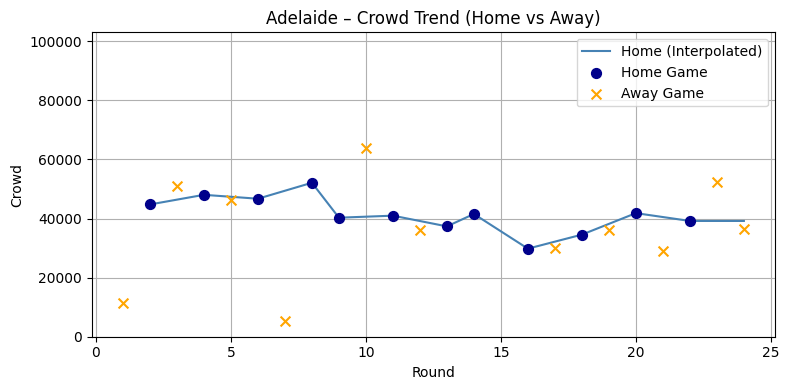

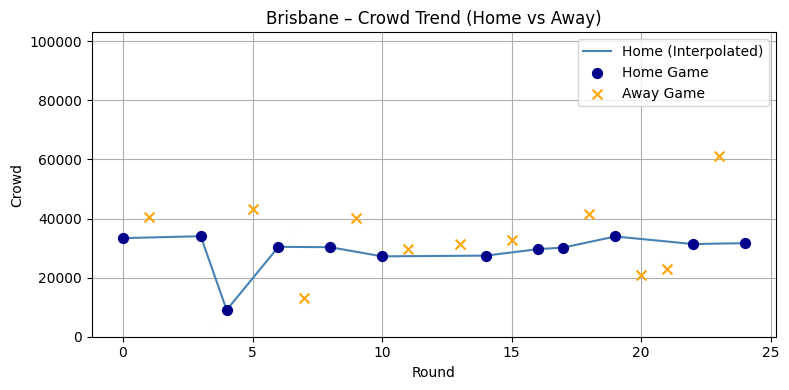

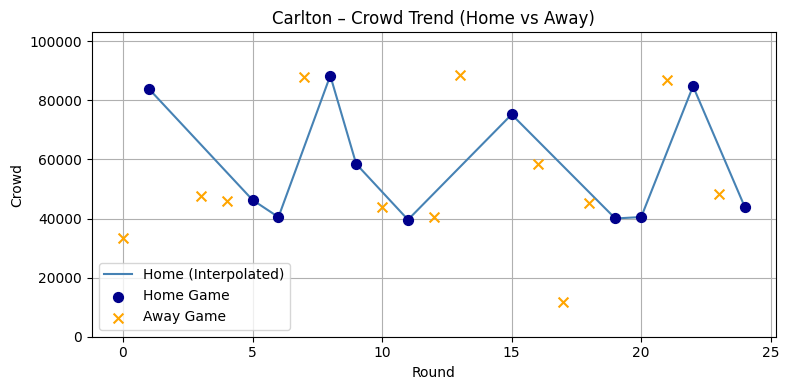

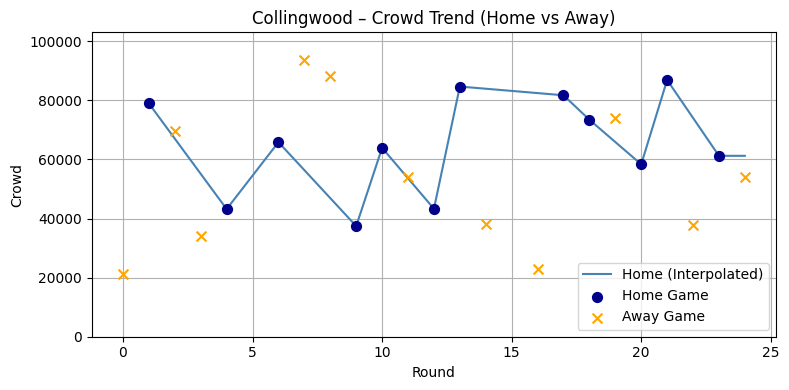

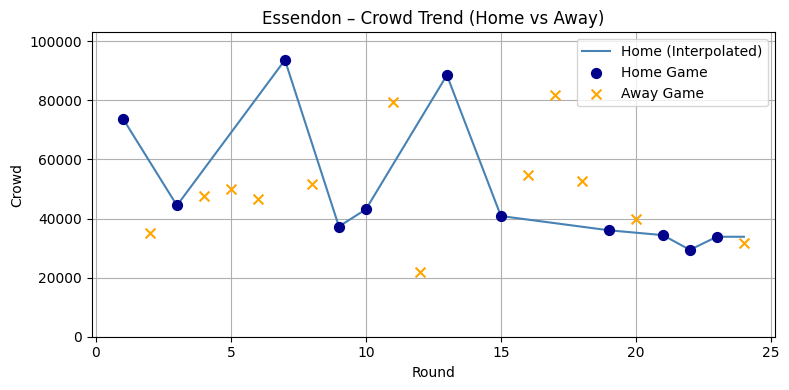

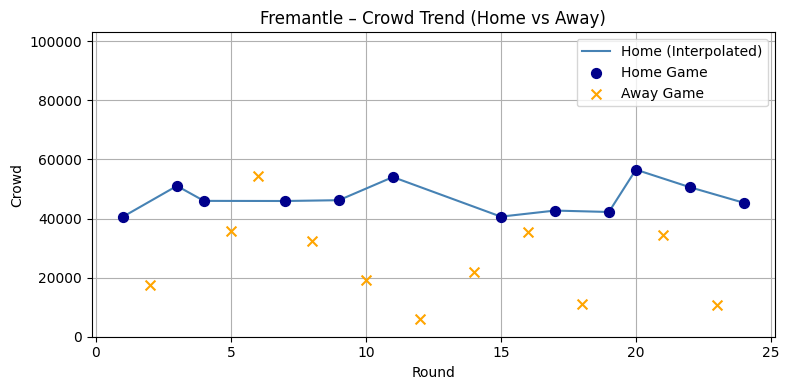

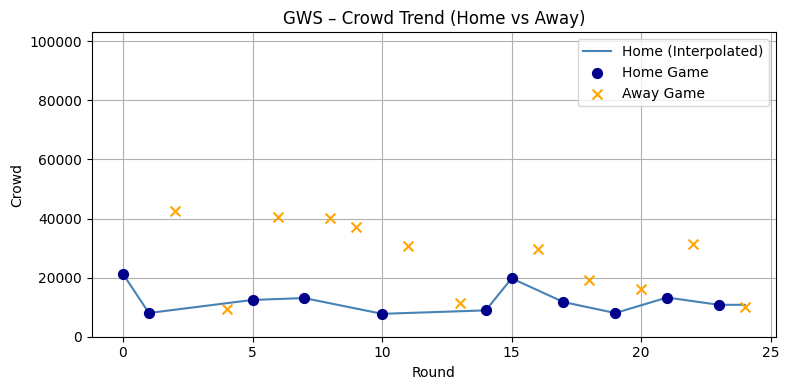

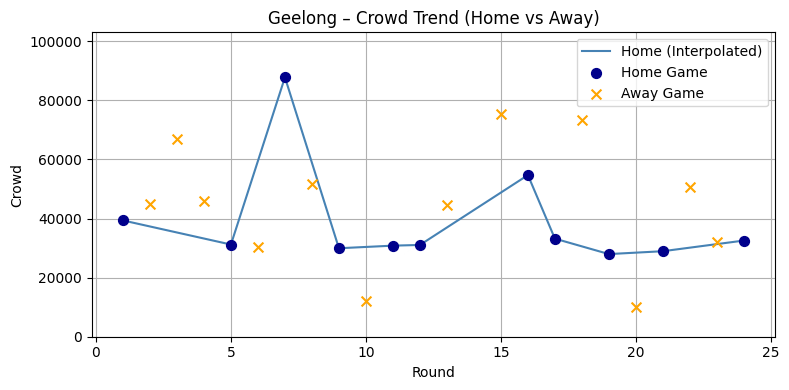

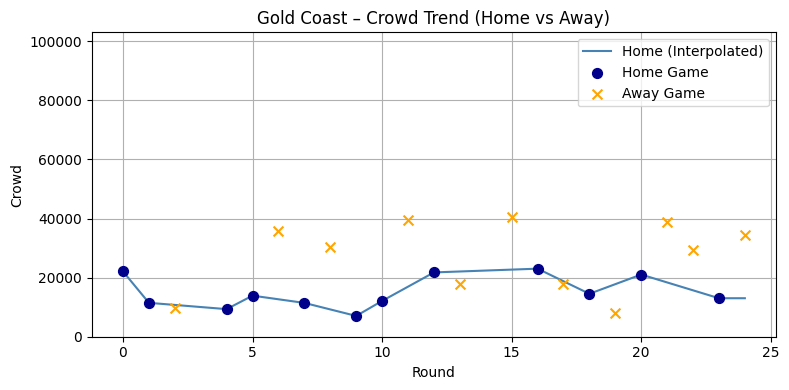

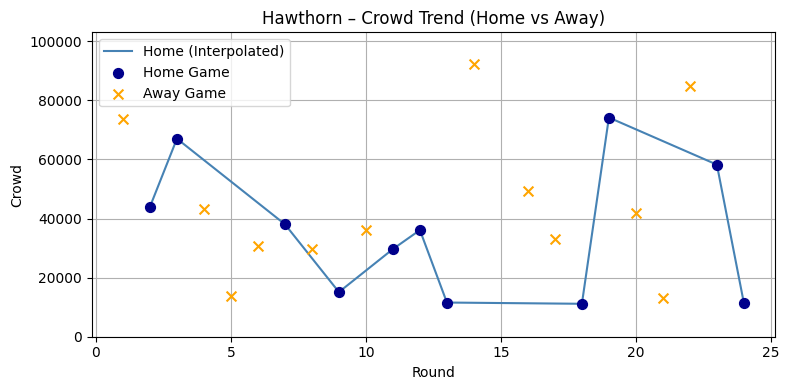

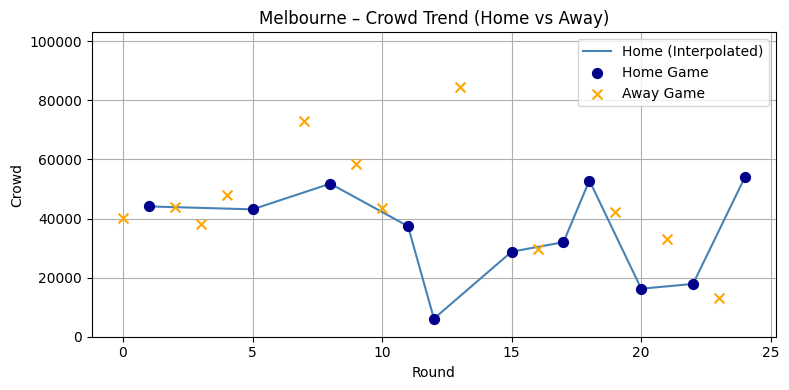

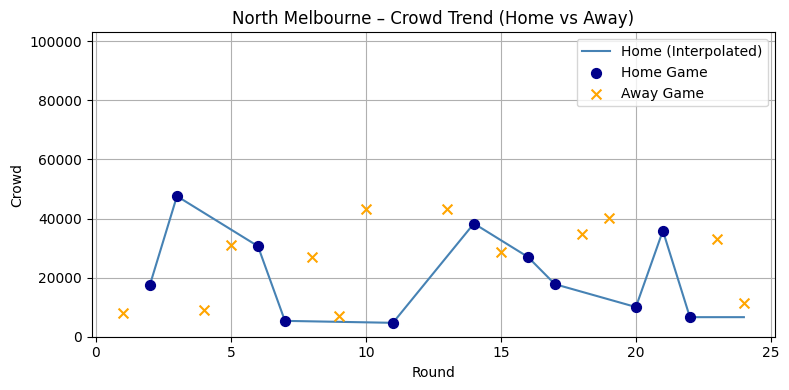

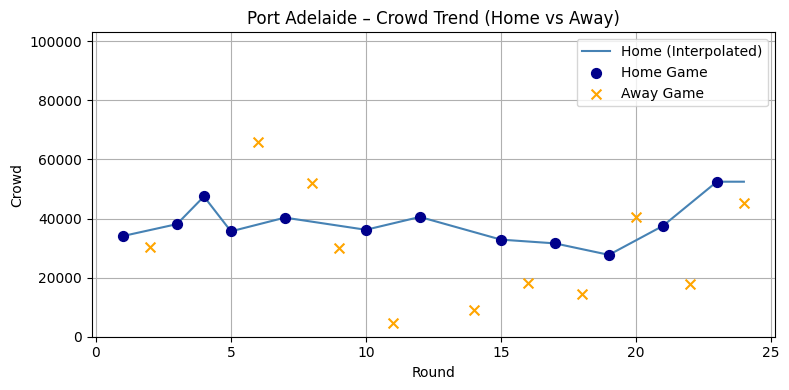

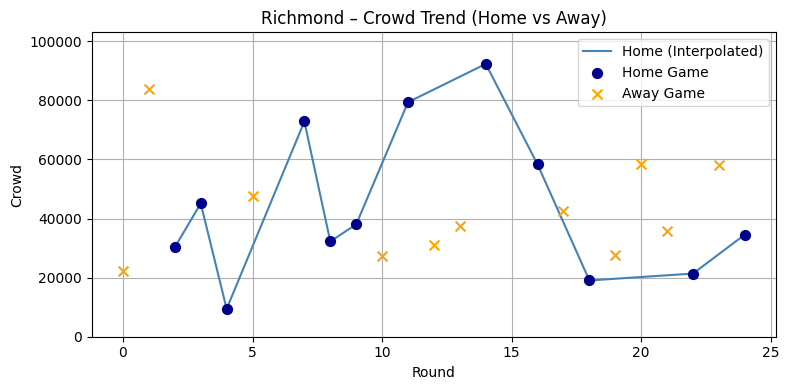

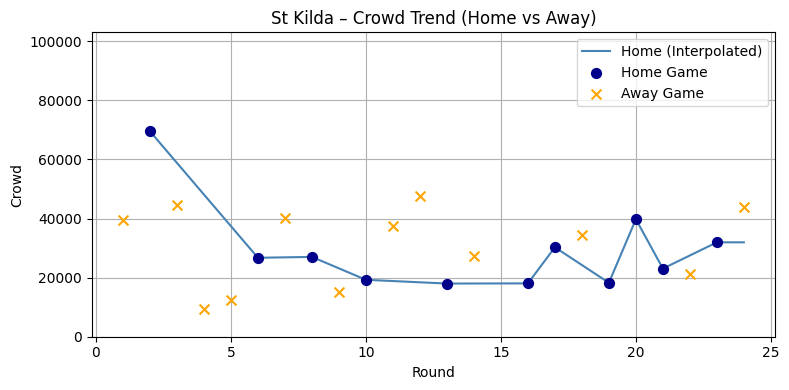

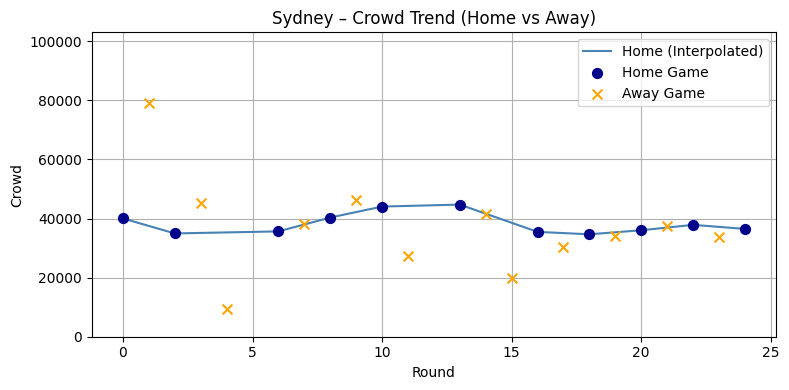

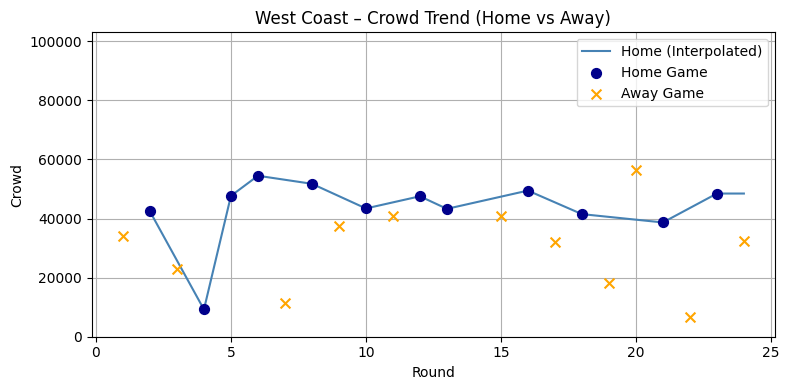

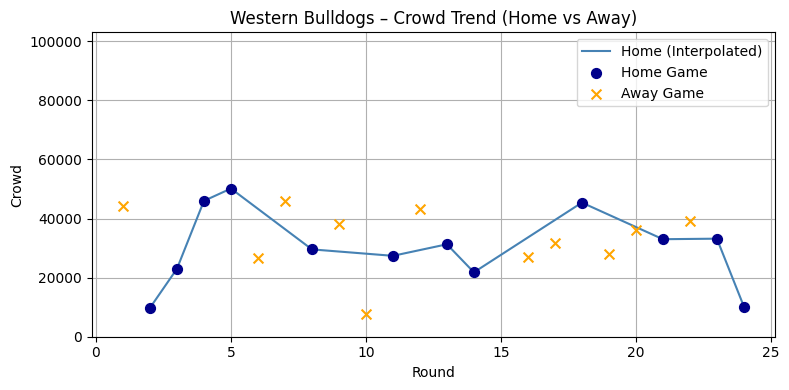

In [69]:
for team in attendance_matrix.columns:
    home_series = attendance_matrix[team]
    away_series = away_matrix[team]

    plt.figure(figsize=(8, 4))

    # Plot home crowd trend line (interpolated)
    plt.plot(
        home_series.index,
        home_series.interpolate(method="linear"),
        color="steelblue",
        label="Home (Interpolated)"
    )

    # Real home game markers
    plt.scatter(
        home_series.index,
        home_series,
        color="darkblue",
        s=50,
        zorder=5,
        label="Home Game"
    )

    # Away game markers (dots only, no line)
    plt.scatter(
        away_series.index,
        away_series,
        color="orange",
        s=50,
        zorder=4,
        marker="x",
        label="Away Game"
    )

    plt.title(f"{team} – Crowd Trend (Home vs Away)")
    plt.xlabel("Round")
    plt.ylabel("Crowd")
    plt.ylim(0, max(attendance_matrix.max().max(), away_matrix.max().max()) * 1.1)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [106]:
attendance_matrix.head(10)

home_team,Adelaide,Brisbane,Carlton,Collingwood,Essendon,Fremantle,GWS,Geelong,Gold Coast,Hawthorn,Melbourne,North Melbourne,Port Adelaide,Richmond,St Kilda,Sydney,West Coast,Western Bulldogs
Round,,,,,,,,,,,,,,,,,,
0,NaN,33367.0,NaN,NaN,NaN,NaN,21235.0,NaN,22086.0,NaN,NaN,NaN,NaN,NaN,NaN,40012.0,NaN,NaN
1,NaN,NaN,83881.0,78933.0,73805.0,40604.0,8034.0,39352.0,11466.0,NaN,44100.0,NaN,34078.0,NaN,NaN,NaN,NaN,NaN
2,44758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43960.0,NaN,17589.0,NaN,30254.0,69517.0,34954.0,42401.0,9752.0
3,NaN,34022.0,NaN,NaN,44412.0,51037.0,NaN,NaN,NaN,67020.0,NaN,47565.0,38105.0,45112.0,NaN,NaN,NaN,22991.0
4,48020.0,9037.0,NaN,43198.0,NaN,45970.0,NaN,NaN,9337.0,NaN,NaN,NaN,47461.0,9425.0,NaN,NaN,9225.0,45970.0
5,NaN,NaN,46283.0,NaN,NaN,NaN,12448.0,31194.0,13900.0,NaN,43098.0,NaN,35658.0,NaN,NaN,NaN,47665.0,50144.0
6,46700.0,30429.0,40474.0,65834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30648.0,NaN,NaN,26719.0,35649.0,54473.0,NaN
7,NaN,NaN,NaN,NaN,93644.0,45931.0,13080.0,87775.0,11440.0,38052.0,NaN,5365.0,40306.0,72840.0,NaN,NaN,NaN,NaN
8,52106.0,30285.0,88362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51795.0,NaN,NaN,32252.0,27009.0,40337.0,51751.0,29555.0


In [131]:
capacity_df = pd.read_csv("venue_capacity.csv")
capacity_df.head(20)

,Venue,Capacity
0,TIO Traeger Park,7164
1,UTAS Stadium,19500
2,TIO Stadium,12215
3,SCG,46817
4,People First Stadium,27500
5,Optus Stadium,60156
6,Norwood Oval,15000
7,Ninja Stadium,19500
8,MCG,100024
9,Marvel Stadium,53343


In [130]:
team_venue_avg = df_regular.groupby(["home_team", "Venue"])["Crowd"].mean().reset_index()


In [132]:
venue_only_merged = pd.merge(venue_summary, capacity_df, on="Venue", how="left")
venue_only_merged.rename(columns={"Average Crowd": "avg_crowd"}, inplace=True)
venue_only_merged["fill_pct"] = venue_only_merged["avg_crowd"] / venue_only_merged["Capacity"]
venue_fill_summary = venue_only_merged.groupby("Venue")["fill_pct"].mean().sort_values(ascending=False)
venue_fill_summary = venue_fill_summary.round(3)  # Format as 0.### (e.g. 0.86 = 86% full)

In [134]:
# Merge crowd data with venue capacity
merged = pd.merge(team_venue_avg, capacity_df, on="Venue", how="left")
merged.rename(columns={"Crowd": "avg_crowd"}, inplace=True)
merged["fill_pct"] = merged["avg_crowd"] / merged["Capacity"]
fill_summary = merged.groupby("home_team")["fill_pct"].mean().sort_values(ascending=False)
fill_summary = fill_summary.round(3)  # Format as 0.### (e.g. 0.86 = 86% full)


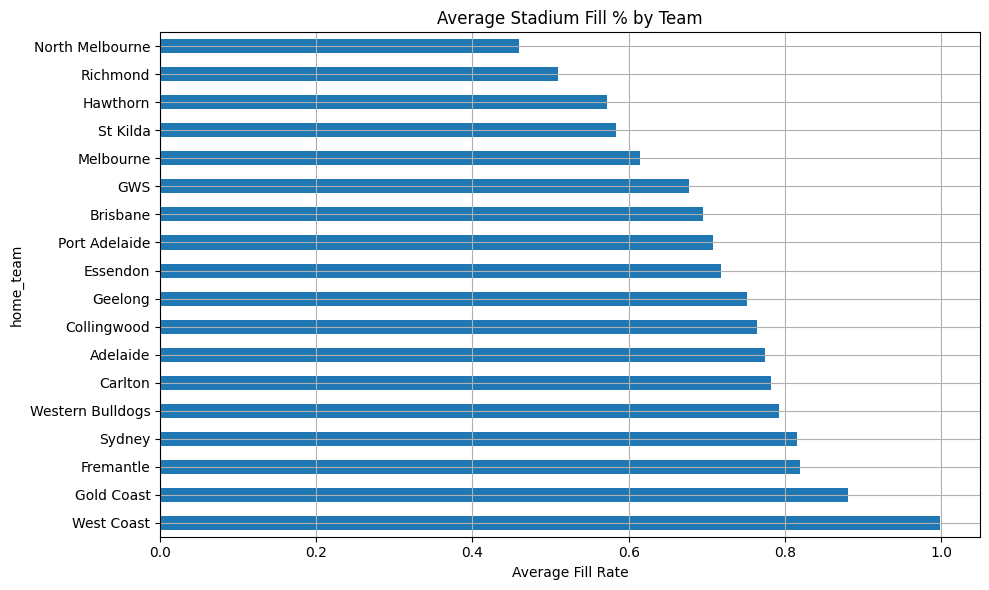

In [135]:
fill_summary.plot(kind="barh", figsize=(10, 6), title="Average Stadium Fill % by Team")
plt.xlabel("Average Fill Rate")
plt.xlim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()


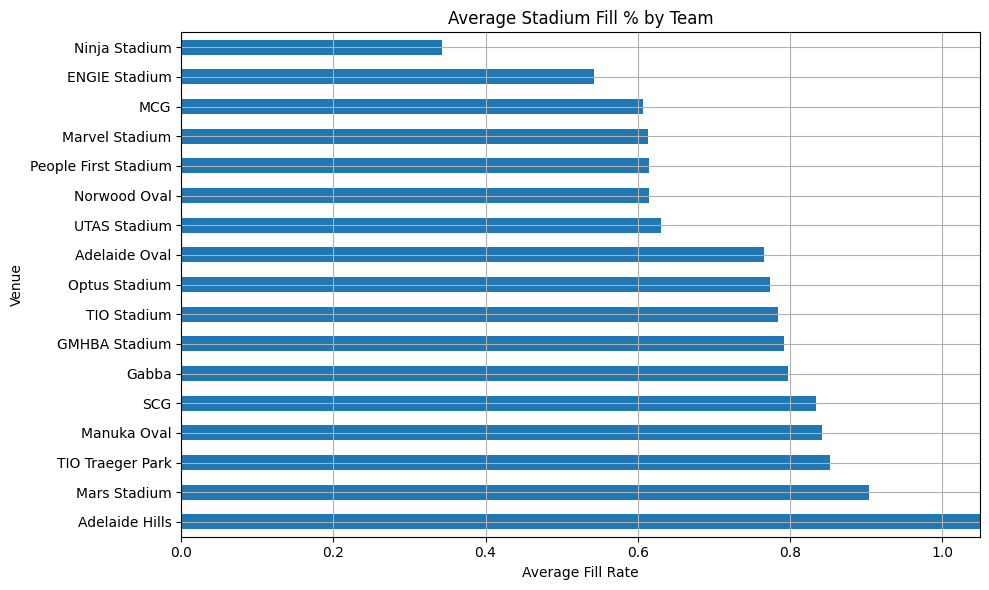

In [137]:
venue_fill_summary.plot(kind="barh", figsize=(10, 6), title="Average Stadium Fill % by Team")
plt.xlabel("Average Fill Rate")
plt.xlim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()
